In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Helper function to draw regression line
def draw_result(x, y, xfit, yfit, cost=None, x_predict=None):
    plt.figure(figsize=(10,5))
    ax = plt.gca()
    ax.grid(color='#b7b7b7', linestyle='-', linewidth=0.5, alpha=0.5)
    plt.scatter(x,y, color='#333333', alpha=0.7)
    plt.plot(xfit,yfit, color='#333333')
    if x_predict:
        ax.axvline(x_predict, color='#121212', linestyle='--', linewidth=1, alpha=0.9)
        plt.scatter(x_predict,yfit[x_predict*100], s=100, c='#212121', alpha=0.7)
    if cost:
        ax.text(0, 10, f'error = {cost:.2f}',fontsize=12,color='#000000')
    plt.show()

In [3]:
# generate random data
sample_size = 50
rng = np.random.RandomState(1)
# generate input and output data with shape = (SAMPLE, FEATURE)
x = np.array([10 * rng.rand(sample_size)]).T
y = 2 * x - 5 + np.array([rng.rand(sample_size)]).T

To predit the value of the incoming points, the simple solution is to approximate $y$ as a continuous linear function of $x$:
\begin{equation}
\hat{y} = f(x, \mathbf{w}) = \omega_0 + \omega_1x
\end{equation}

Objective: find $\mathbf{w}$ which minimize the error.
\begin{equation}
J(\mathbf{w}) = \frac{1}{2n}\sum_{i=1}^{N}(f(x_i, \mathbf{w}) - y_i)^2
\end{equation}

Let's start with random values of $\omega_0$ and $\omega_1$.

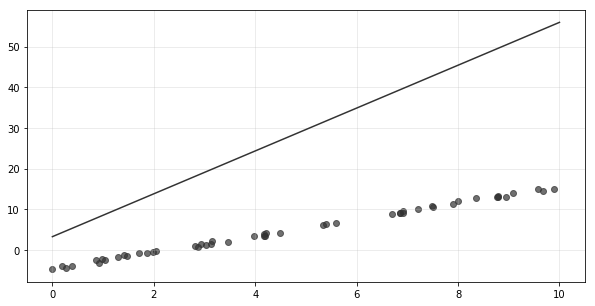

In [4]:
# initilize weights with shape = (INPUT NODES, OUTPUT NODES)
weights = np.array([10 * rng.rand(2)]).T

xfit = np.linspace(0, 10, 1000)
yfit = weights[0] + weights[1] * xfit

draw_result(x, y, xfit, yfit)

## Linear regression

Optimize fit line with linear regression.

### 1. Feedforward
\begin{equation}
\mathbf{\hat{y}} = XW
\end{equation}

### 2. Compute cost function
\begin{equation}
J(\mathbf{y}, \mathbf{\hat{y}}) = \frac{1}{2m}(\mathbf{\hat{y}} - \mathbf{y})^T(\mathbf{\hat{y}} - \mathbf{y})
\end{equation}

### 3. Backpropagation
\begin{equation}
\frac{\partial J(\mathbf{y}, \mathbf{\hat{y}})}{\partial W} 
= \frac{\partial J(\mathbf{y}, \mathbf{\hat{y}})}{\partial \mathbf{\hat{y}}} \cdot \frac{\partial \mathbf{\hat{y}}}{\partial W} 
= \frac{1}{m}X^T(\mathbf{\hat{y}} - \mathbf{y})
\end{equation}

### 4. Gradient descent
\begin{equation}
W = W - \alpha  \frac{\partial J(\mathbf{y}, \mathbf{\hat{y}})}{\partial W}
\end{equation}

In [5]:
class LinearRegression:
    """ Simple linear regression """
    def __init__(self):
        pass
    
    def _init_params(self, x, y, iterations, learning_rate, reg_factor):
        """ Initilize parameters. 
        
        ----------
        W : ndarray, shape (n_features+1,)
            Coefficient vector
        """
        self._X = np.hstack([np.ones((x.shape[0], 1)), x])
        self._y = y
        self._learning_rate = learning_rate
        self._reg_factor = reg_factor
        self.weights_ = np.random.rand(self._X.shape[1],1)
        self.costs_ = np.zeros(iterations)
    
    def _feedforward(self):
        """ Computes np.dot(X, W). """
        self._y_hat = self._X.dot(self.weights_)
        
    def _backprop(self):
        """ Update weights. """
        m = len(self._y)
        # update weights with L2 regularization term
        _weights = self.weights_.copy()
        # ignore bias term
        _weights[0, 0] = 0 
        self.weights_ -= self._learning_rate * self._X.T.dot(self._y_hat - self._y)/m + self._reg_factor/m*_weights
    
    def _get_cost(self):
        """ Compute loss. """
        m = len(self._y)
        errors = self._y-self._y_hat
        # cost function with L2 regularization term
        _weights = self.weights_.copy()
        # ignore bias term
        _weights[0, 0] = 0    
        return 0.5/m * errors.T.dot(errors) + self._reg_factor/(2*m)*_weights.T.dot(_weights)

    def fit(self, x, y, iterations=1000, learning_rate=0.02, reg_factor=0.5):
        """ Fit model.
        
        ----------
        x : ndarray, shape (n_samples, n_features)
            Training data
        y : ndarray, shape (n_samples,)
            Target data
        """
        self._init_params(x, y, iterations, learning_rate, reg_factor)
        
        # train model
        for i in range(iterations):
            self._feedforward()
            self._backprop()
            self.costs_[i] = self._get_cost()
            
        return self

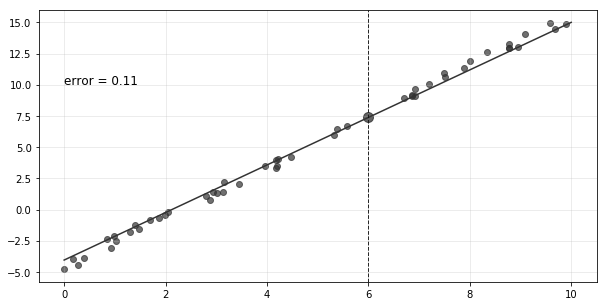

In [6]:
# Linear function
lr = LinearRegression()
model = lr.fit(x, y)

Xfit = np.vstack((np.ones((xfit.shape[0], )), xfit)).T
yfit = Xfit.dot(model.weights_)

draw_result(x, y, xfit, yfit, cost=model.costs_[-1], x_predict=6)

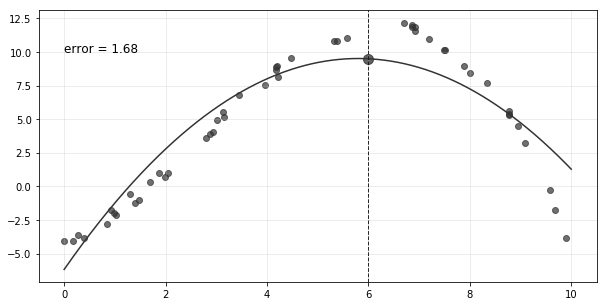

In [8]:
# Polynomial function
x_ = np.hstack([x, x**2])
y_ = 2 * x + 0.6 * x**2 - 0.08 * x**3 - 5 + np.array([rng.rand(sample_size)]).T

lr_ = LinearRegression()
model_ = lr_.fit(x_, y_, iterations=50000, learning_rate=0.001, reg_factor=0.005)

Xfit_ = np.vstack([np.ones((xfit.shape[0], )), xfit, xfit**2]).T
yfit_ = Xfit_.dot(model_.weights_)

draw_result(x, y_, xfit, yfit_, cost=model_.costs_[-1], x_predict=6)